<a href="https://colab.research.google.com/github/bhavik-knight/Supervised-Learning-Workshop-bk/blob/main/notebooks/1_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Cleaning

Data cleaning is a crucial preprocessing step in any machine learning project. The quality of your data directly impacts the quality of your model. Real-world data is often messy, containing missing values, irrelevant information, and inconsistencies. The goal of data cleaning is to handle these issues to prepare a reliable and accurate dataset for model training.

#### 1.1 Impute Missing Values
Missing values, often represented as `NaN` (Not a Number), `None`, or other placeholders, can occur for various reasons, such as data entry errors or data loss. Most machine learning algorithms cannot handle missing values, so we need to address them. Common strategies include:
*   **Mean/Median/Mode Imputation:** Replacing missing numerical data with the mean or median of the column, and categorical data with the mode (most frequent value). Median is often preferred over mean when the data has outliers.
*   **Constant Value Imputation:** Replacing missing values with a constant, like 0, or a specific string like "Unknown".
*   **Dropping Rows/Columns:** If a row or column has a large number of missing values, it might be better to remove it entirely.

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame with missing values
df = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40, 45, 50, np.nan],
    'Salary': [50000, 60000, 70000, np.nan, 80000, 90000, np.nan, 100000],
    'City': ['New York', 'London', 'Paris', 'Tokyo', np.nan, 'New York', 'London', 'Paris'],
    'Experience_Years': [2, 5, 7, 10, 12, np.nan, np.nan, np.nan],
    'Contact_Provided': [True, False, True, False, True, np.nan, np.nan, np.nan]
})

print("Original DataFrame:")
print(df)

# 1. Mean/Median/Mode Imputation
df_mean_mode = df.copy()
df_mean_mode['Age'].fillna(df_mean_mode['Age'].mean(), inplace=True)  # Mean for numeric
df_mean_mode['City'].fillna(df_mean_mode['City'].mode()[0], inplace=True)  # Mode for categorical
print("\nAfter Mean/Mode Imputation:")
print(df_mean_mode)

df_median_mode = df.copy()
df_median_mode['Age'].fillna(df_median_mode['Age'].median(), inplace=True)  # Median for numeric
df_median_mode['City'].fillna(df_median_mode['City'].mode()[0], inplace=True)  # Mode for categorical
print("\nAfter Median/Mode Imputation:")
print(df_median_mode)

# 2. Constant Value Imputation
df_constant = df.copy()
df_constant.fillna({'Age': 0, 'Salary': 0, 'City': 'Unknown', 'Contact_Provided': 'Unknown'}, inplace=True)
print("\nAfter Constant Value Imputation:")
print(df_constant)

# 3. Dropping Rows/Columns
df_drop_rows = df.dropna()  # Drop rows with any missing values
print("\nAfter Dropping Rows with Missing Values:")
print(df_drop_rows)

df_drop_cols = df.dropna(axis=1)  # Drop columns with any missing values
print("\nAfter Dropping Columns with Missing Values:")
print(df_drop_cols)

Original DataFrame:
    Age    Salary      City  Experience_Years Contact_Provided
0  25.0   50000.0  New York               2.0             True
1  30.0   60000.0    London               5.0            False
2   NaN   70000.0     Paris               7.0             True
3  35.0       NaN     Tokyo              10.0            False
4  40.0   80000.0       NaN              12.0             True
5  45.0   90000.0  New York               NaN              NaN
6  50.0       NaN    London               NaN              NaN
7   NaN  100000.0     Paris               NaN              NaN

After Mean/Mode Imputation:
    Age    Salary      City  Experience_Years Contact_Provided
0  25.0   50000.0  New York               2.0             True
1  30.0   60000.0    London               5.0            False
2  37.5   70000.0     Paris               7.0             True
3  35.0       NaN     Tokyo              10.0            False
4  40.0   80000.0    London              12.0             True
5  45.

/var/folders/x4/3dhpmp356x5gdqm4wq02jfnh0000gn/T/ipykernel_99604/3010607234.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_mode['Age'].fillna(df_mean_mode['Age'].mean(), inplace=True)  # Mean for numeric
/var/folders/x4/3dhpmp356x5gdqm4wq02jfnh0000gn/T/ipykernel_99604/3010607234.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

#### 1.2 Drop Redundant Columns
Some columns in a dataset may not provide useful information for prediction and can even negatively affect model performance. These are considered redundant and should be dropped. Examples include:
*   **Identifier Columns:** Columns that act as unique identifiers for each row (e.g., `customer_id`, `serial_number`) usually don't have predictive power.
*   **Highly Correlated Columns:** If two features are highly correlated, they provide similar information. Keeping both can introduce multicollinearity, which can be an issue for some models. It's often a good practice to remove one of them.
*   **Columns with Low Variance:** A feature where most of the values are the same provides little information to the model.

In [2]:
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'serial_number': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'feature_1': [10, 20, 30, 40, 50],
    'feature_2': [15, 25, 35, 45, 55],  # Highly correlated with feature_1
    'feature_3': [1, 1, 1, 1, 1],       # Low variance
    'target': [0, 1, 0, 1, 0]
})

print("Original DataFrame:")
print(df)

# 1. Drop Identifier Columns
identifier_columns = ['customer_id', 'serial_number']
df = df.drop(columns=identifier_columns, errors='ignore')
print("\nAfter Dropping Identifier Columns:")
print(df)

# 2. Drop Highly Correlated Columns
correlation_threshold = 0.9
correlation_matrix = df.corr().abs()
print("\nCorrelation Matrix:")
print(correlation_matrix)

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
print(f"Upper triangle:\n{upper_triangle}")
highly_correlated = [col for col in upper_triangle.columns if any(upper_triangle[col] > correlation_threshold)]
print("\nHighly Correlated Columns to Drop:")
print(highly_correlated)

df = df.drop(columns=highly_correlated, errors='ignore')
print("\nAfter Dropping Highly Correlated Columns:")
print(df)

# 3. Drop Columns with Low Variance
low_variance_threshold = 0.01
low_variance_columns = [col for col in df.columns if df[col].nunique() / len(df) < low_variance_threshold]
print("\nLow Variance Columns to Drop:")
print(low_variance_columns)

df = df.drop(columns=low_variance_columns, errors='ignore')
print("\nAfter Dropping Low Variance Columns:")
print(df)

# Final DataFrame
print("\nFinal Reduced DataFrame:")
print(df)

Original DataFrame:
   customer_id serial_number  feature_1  feature_2  feature_3  target
0            1            A1         10         15          1       0
1            2            A2         20         25          1       1
2            3            A3         30         35          1       0
3            4            A4         40         45          1       1
4            5            A5         50         55          1       0

After Dropping Identifier Columns:
   feature_1  feature_2  feature_3  target
0         10         15          1       0
1         20         25          1       1
2         30         35          1       0
3         40         45          1       1
4         50         55          1       0

Correlation Matrix:
           feature_1  feature_2  feature_3  target
feature_1        1.0        1.0        NaN     0.0
feature_2        1.0        1.0        NaN     0.0
feature_3        NaN        NaN        NaN     NaN
target           0.0        0.0        Na

#### 1.3 Handle Inconsistent Data Types and Outliers
*   **Inconsistent Data Types:** It's important to ensure that each column has a consistent and appropriate data type. For example, a column intended to be numeric might contain string values due to data entry errors (e.g., '100' instead of 100). These need to be corrected to their proper type.

*   **Outliers:** Outliers are data points that are significantly different from other observations. They can be legitimate data points or errors. Outliers can skew the training process, leading to a less accurate model. They can be detected using statistical methods (like Z-score or IQR) or visualization (like box plots). Depending on the context, outliers can be removed, capped (replaced with the nearest non-outlier value), or transformed.

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame with inconsistent data types and outliers
df = pd.DataFrame({
    'Age': [25, '30', '40 years', 35, 120, 45, 50, '35 years'],  # Inconsistent types and outlier (120)
    'Salary': [50000, '$60,000', '85k', 70000, 1000000, 5000, 90000, 100000],  # Inconsistent types and outliers
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'London', 'Paris', 'Tokyo']
})

print("Original DataFrame:")
print(df)

# 1. Handle Inconsistent Data Types
def clean_numeric_column(column):
    def to_numeric(value):
        if isinstance(value, (int, float)):
            return value
        value = str(value).replace(',', '').replace('$', '').replace('k', '000').split()[0]
        try:
            return float(value)
        except ValueError:
            return np.nan
    return column.apply(to_numeric)

df['Age'] = clean_numeric_column(df['Age'])
df['Salary'] = clean_numeric_column(df['Salary'])

print("\nAfter Fixing Inconsistent Data Types:")
print(df)

# 2. Handle Outliers using IQR
def cap_outliers(column):
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return column.clip(lower=lower_bound, upper=upper_bound)

df['Age'] = cap_outliers(df['Age'])
df['Salary'] = cap_outliers(df['Salary'])

print("\nAfter Handling Outliers (Capping):")
print(df)

Original DataFrame:
        Age   Salary      City
0        25    50000  New York
1        30  $60,000    London
2  40 years      85k     Paris
3        35    70000     Tokyo
4       120  1000000  New York
5        45     5000    London
6        50    90000     Paris
7  35 years   100000     Tokyo

After Fixing Inconsistent Data Types:
     Age     Salary      City
0   25.0    50000.0  New York
1   30.0    60000.0    London
2   40.0    85000.0     Paris
3   35.0    70000.0     Tokyo
4  120.0  1000000.0  New York
5   45.0     5000.0    London
6   50.0    90000.0     Paris
7   35.0   100000.0     Tokyo

After Handling Outliers (Capping):
    Age    Salary      City
0  25.0   50000.0  New York
1  30.0   60000.0    London
2  40.0   85000.0     Paris
3  35.0   70000.0     Tokyo
4  65.0  145000.0  New York
5  45.0    5000.0    London
6  50.0   90000.0     Paris
7  35.0  100000.0     Tokyo


## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data science workflow that involves analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA helps you understand the structure of your data, detect outliers and anomalies, and discover patterns before applying machine learning algorithms.

### 2.1 Summaries, Distributions, Pair Plots, Correlation Heatmap (Matplotlib)

The first step in EDA is to get a comprehensive overview of your dataset through statistical summaries and visualizations. This includes examining distributions of individual features, relationships between pairs of features, and correlations among numeric variables.

Statistical Summary:
              Age        Salary  Experience_Years      Target
count  1000.00000   1000.000000       1000.000000  1000.00000
mean     43.81900  50863.121000         24.992000     0.50000
std      14.99103  14823.257362         14.503527     0.50025
min      18.00000   6556.000000          0.000000     0.00000
25%      31.00000  40822.250000         13.000000     0.00000
50%      44.00000  50807.000000         25.000000     0.50000
75%      56.00000  60281.750000         37.000000     1.00000
max      69.00000  89485.000000         49.000000     1.00000


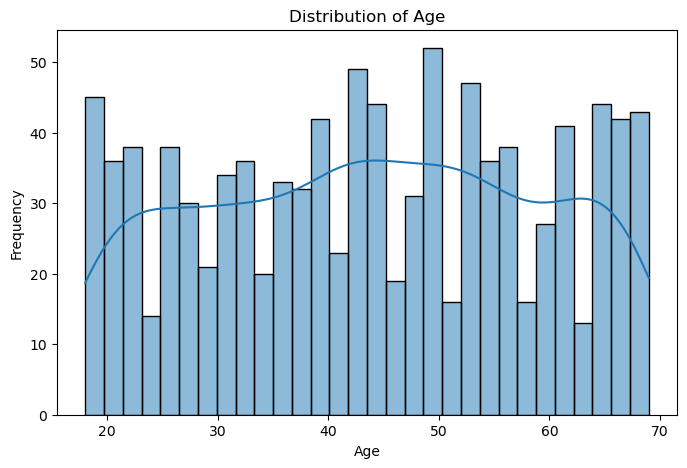

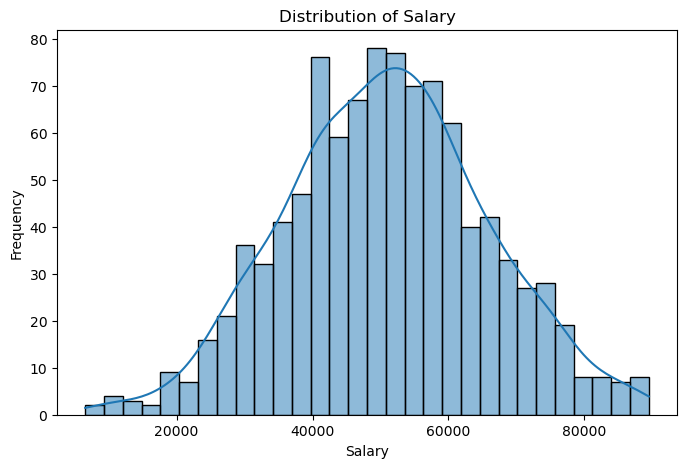

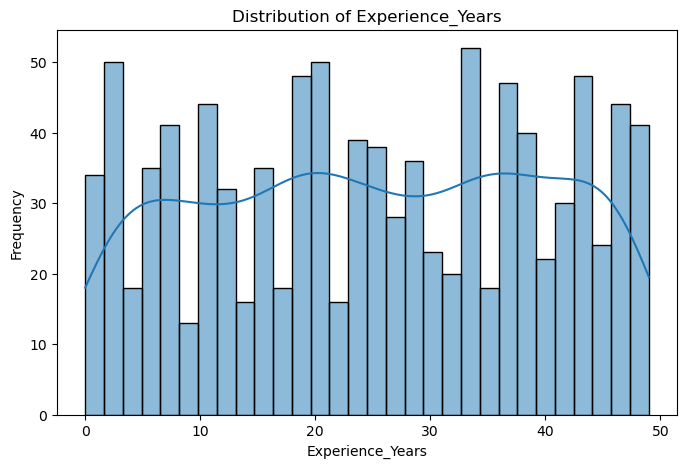

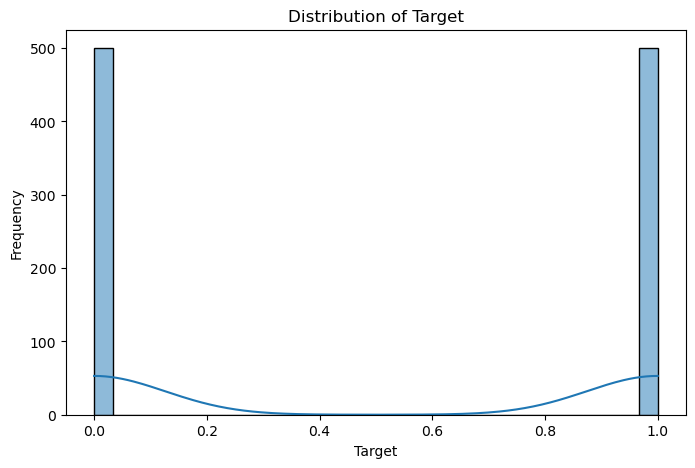

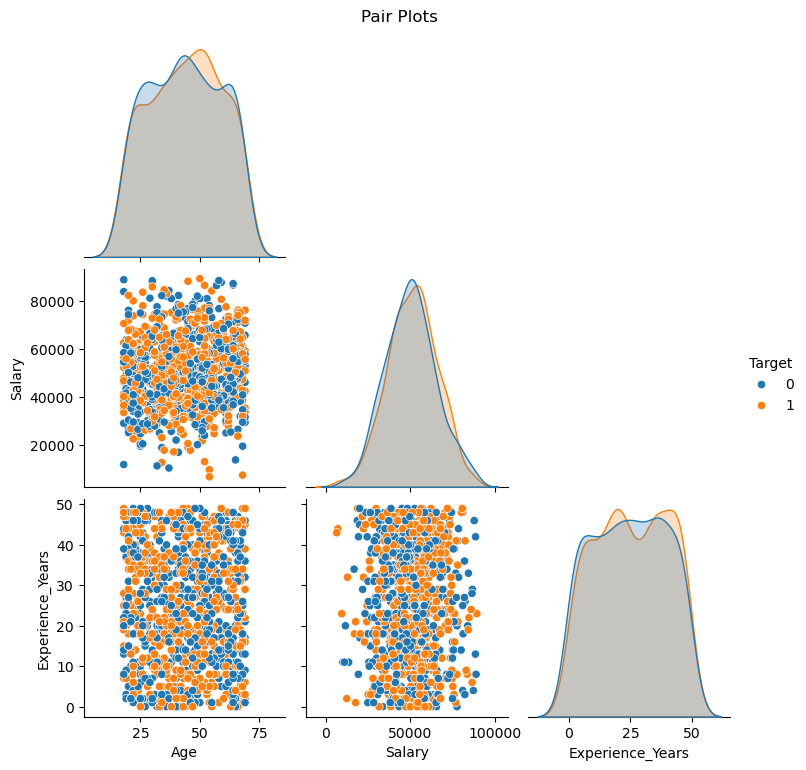

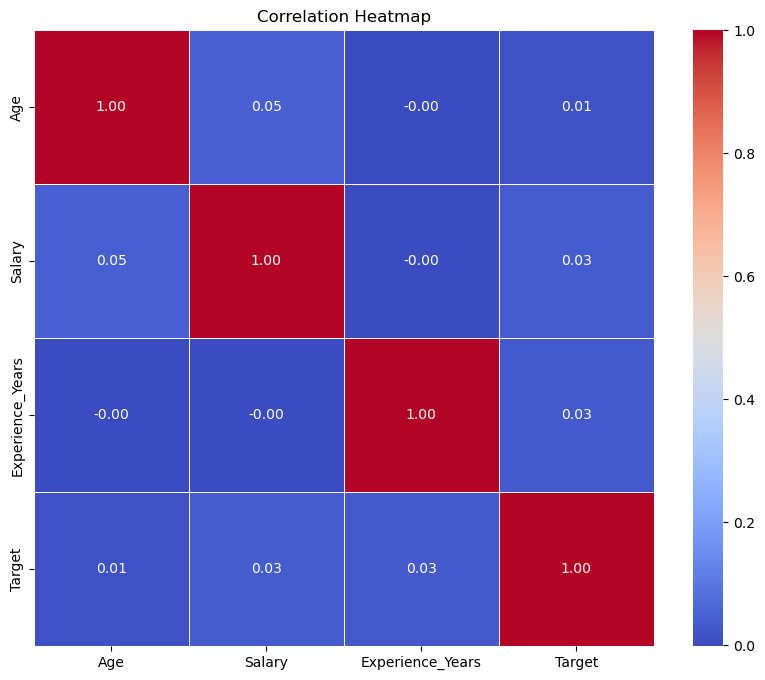

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate a larger synthetic dataset
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=n_samples),  # Random ages between 18 and 70
    'Salary': np.random.normal(50000, 15000, size=n_samples).astype(int),  # Normally distributed salaries
    'Experience_Years': np.random.randint(0, 50, size=n_samples),  # Random experience years
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=n_samples),  # Categorical
    'Target': np.random.choice([0, 1], size=n_samples)  # Binary target variable
})

# 1. Statistical Summaries
print("Statistical Summary:")
print(df.describe())  # Provides a summary of numerical columns

# 2. Distribution Plots
# Visualize the distribution of each numeric column
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# 3. Pair Plots
# Pairwise relationships between numeric features, colored by the target variable
sns.pairplot(df, hue='Target', diag_kind='kde', corner=True)
plt.suptitle('Pair Plots', y=1.02)
plt.show()

# 4. Correlation Heatmap
# Compute the correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Feature engineering
### 3.1 Encoding (categorical → numerical)

Models work with numbers, so categorical columns must be converted to numeric form. Pick an encoding that matches your data and model:

- **One-hot encoding:** Creates a 0/1 column per category. Safe default for tree models and linear models with low/medium cardinality. Can explode feature count if there are many categories.
- **Ordinal encoding:** Maps categories to integers (A→0, B→1, …). Use only when the category order is meaningful; otherwise it injects fake order.
- **Frequency/Count encoding:** Replace each category with its frequency or count. Useful for high-cardinality features; keeps the feature 1-D.
- **Target/Mean encoding:** Replace each category with the mean of the target (with smoothing and CV). Powerful for high-cardinality features but **must** be done with out-of-fold logic to avoid leakage.
- **Hashing:** Fixed-size hashed bins for very high cardinality or streaming scenarios; trades transparency for speed and memory control.

Practical rules:
- Fit encoders on the **train** split only; apply to validation/test.
- Treat missing values as an explicit category when helpful.
- For one-hot, consider dropping one column per feature to avoid multicollinearity in linear models.
- Watch model/runtime costs when categories are numerous; prefer count/target/hashing for very large vocabularies.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher

# Sample DataFrame with categorical features
df = pd.DataFrame({
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'London', 'Paris', 'Tokyo'],
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD', 'Master', 'Bachelor', 'PhD', 'High School'],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1]
})

print("Original DataFrame:")
print(df)

# 1. One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
one_hot_encoded = one_hot_encoder.fit_transform(df[['City']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['City']))
print("\nOne-Hot Encoded DataFrame:")
print(one_hot_df)

# 2. Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']])  # Define order
df['Education_Level_Ordinal'] = ordinal_encoder.fit_transform(df[['Education_Level']])
print("\nOrdinal Encoded DataFrame:")
print(df[['Education_Level', 'Education_Level_Ordinal']])

# 3. Frequency/Count Encoding
city_counts = df['City'].value_counts()
df['City_Frequency'] = df['City'].map(city_counts)
print("\nFrequency Encoded DataFrame:")
print(df[['City', 'City_Frequency']])

# 4. Target/Mean Encoding
city_target_mean = df.groupby('City')['Target'].mean()
df['City_Target_Mean'] = df['City'].map(city_target_mean)
print("\nTarget Encoded DataFrame:")
print(df[['City', 'City_Target_Mean']])

# 5. Hashing
hasher = FeatureHasher(n_features=4, input_type='string')  # Hash into 4 features
hashed_features = hasher.fit_transform(df['City'].apply(lambda x: [x]))  # Wrap each value in a list
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'Hash_{i}' for i in range(4)])
print("\nHashed DataFrame:")
print(hashed_df)

Original DataFrame:
       City Education_Level  Target
0  New York     High School       0
1    London        Bachelor       1
2     Paris          Master       0
3     Tokyo             PhD       1
4  New York          Master       0
5    London        Bachelor       1
6     Paris             PhD       0
7     Tokyo     High School       1

One-Hot Encoded DataFrame:
   City_New York  City_Paris  City_Tokyo
0            1.0         0.0         0.0
1            0.0         0.0         0.0
2            0.0         1.0         0.0
3            0.0         0.0         1.0
4            1.0         0.0         0.0
5            0.0         0.0         0.0
6            0.0         1.0         0.0
7            0.0         0.0         1.0

Ordinal Encoded DataFrame:
  Education_Level  Education_Level_Ordinal
0     High School                      0.0
1        Bachelor                      1.0
2          Master                      2.0
3             PhD                      3.0
4          Maste

### 3.2 Scaling / normalizing numeric columns (min–max, standardization)

Putting numeric features on comparable scales prevents any one feature from dominating just because of its units and often speeds up model training.

When it matters:
- Distance-based or geometry-sensitive methods: k-NN, k-means, SVMs, PCA, neural nets, linear models with regularization.
- Usually **not** needed for tree models (Random Forest, XGBoost, LightGBM).

Common options:
- **Min–max scaling** (normalization): `x' = (x - min) / (max - min)` → typically [0, 1]. Simple, but sensitive to outliers.
- **Standardization** (z-score): `z = (x - μ) / σ` → mean 0, std 1. Works well for many models; less sensitive to range but still affected by extreme outliers.
- **Robust scaling** (median/IQR): centers by median and scales by IQR; use when heavy outliers are present.
- Optional **log/Box-Cox** transforms: reduce skew before scaling.

Practical rules:
- Split your data first; **fit the scaler on the train set only**, then transform validation/test to avoid leakage.
- Handle missing values before scaling (or use scalers that can ignore NaNs).
- Do **not** scale the target unless your model or loss benefits from it; if you do, remember to invert at inference.
- Save the fitted scaler with the model so inference uses the same transformation.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Sample DataFrame with numeric columns
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Experience_Years': [2, 5, 7, 10, 12]
})

print("Original DataFrame:")
print(df)

# 1. Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("\nMin-Max Scaled DataFrame:")
print(df_min_max_scaled)

# 2. Standardization (Z-Score Scaling)
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nStandardized DataFrame:")
print(df_standard_scaled)

# 3. Robust Scaling (Median/IQR)
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("\nRobust Scaled DataFrame:")
print(df_robust_scaled)

Original DataFrame:
   Age  Salary  Experience_Years
0   25   50000                 2
1   30   60000                 5
2   35   70000                 7
3   40   80000                10
4   45   90000                12

Min-Max Scaled DataFrame:
    Age  Salary  Experience_Years
0  0.00    0.00               0.0
1  0.25    0.25               0.3
2  0.50    0.50               0.5
3  0.75    0.75               0.8
4  1.00    1.00               1.0

Standardized DataFrame:
        Age    Salary  Experience_Years
0 -1.414214 -1.414214         -1.467265
1 -0.707107 -0.707107         -0.620766
2  0.000000  0.000000         -0.056433
3  0.707107  0.707107          0.790066
4  1.414214  1.414214          1.354398

Robust Scaled DataFrame:
   Age  Salary  Experience_Years
0 -1.0    -1.0              -1.0
1 -0.5    -0.5              -0.4
2  0.0     0.0               0.0
3  0.5     0.5               0.6
4  1.0     1.0               1.0


### 3.3 Log transformations for skewed distributions

Many real-world numeric features (counts, amounts, durations) are right-skewed with a few very large values. A log transform compresses large values and spreads small ones, making the distribution more symmetric and stabilizing variance. This often improves fit for distance-based and linear methods by turning multiplicative relationships into additive ones.

Original DataFrame (first 5 rows):
          Income     Expenses       Savings
0   23463.404499   409.460564   3034.127314
1  150506.071546  1561.339692   2836.618963
2   65837.284677  4126.283589  23671.724742
3   45647.127689  2635.215558   2870.771886
4    8481.243523  3285.587652   3173.851757

Log-Transformed DataFrame (first 5 rows):
      Income  Expenses    Savings
0  10.063240  6.017280   8.018009
1  11.921765  7.353940   7.950721
2  11.094957  8.325375  10.072079
3  10.728718  7.877100   7.962685
4   9.045730  8.097605   8.063016


/var/folders/x4/3dhpmp356x5gdqm4wq02jfnh0000gn/T/ipykernel_99604/3946376632.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log_transformed = df.applymap(lambda x: np.log1p(x))


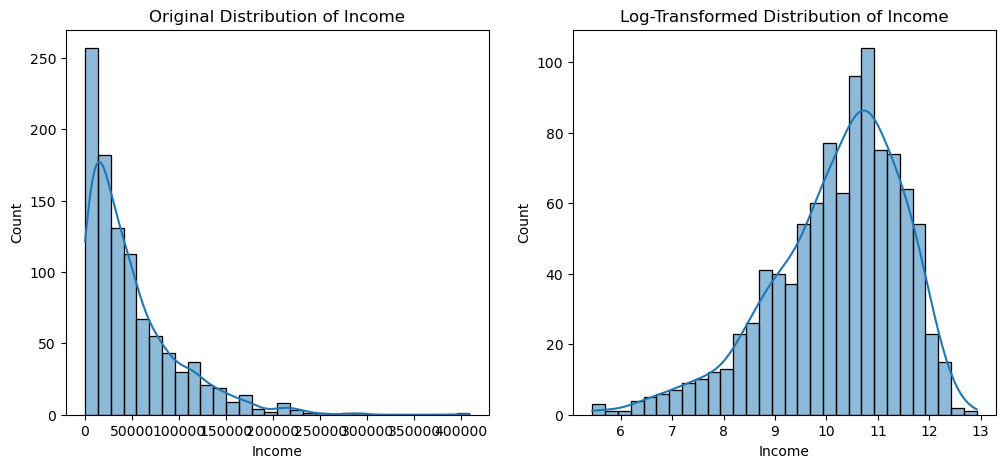

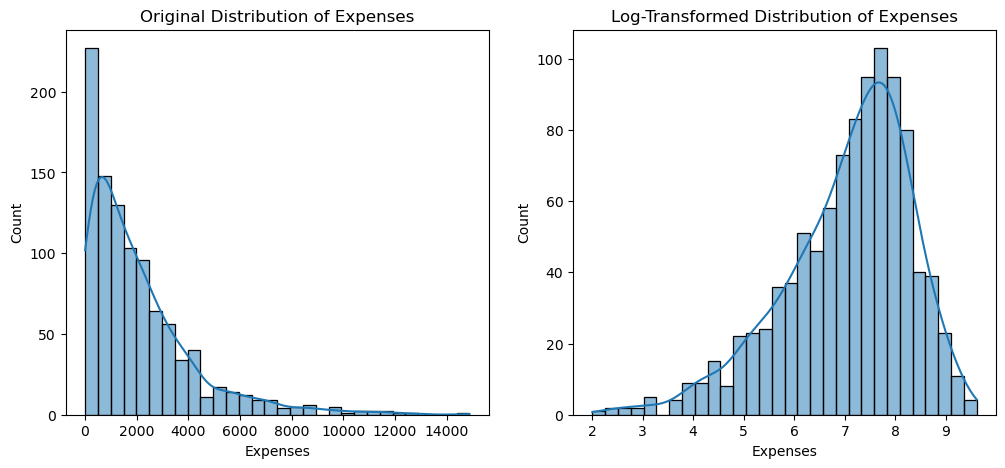

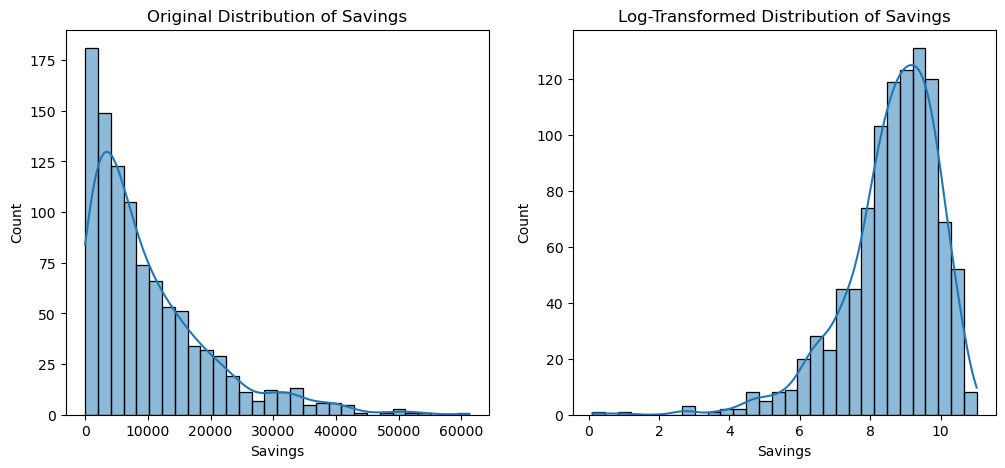

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a larger synthetic dataset with skewed distributions
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'Income': np.random.exponential(scale=50000, size=n_samples),  # Right-skewed income
    'Expenses': np.random.exponential(scale=2000, size=n_samples),  # Right-skewed expenses
    'Savings': np.random.exponential(scale=10000, size=n_samples)   # Right-skewed savings
})

print("Original DataFrame (first 5 rows):")
print(df.head())

# Log transformation (adding 1 to avoid log(0))
df_log_transformed = df.applymap(lambda x: np.log1p(x))

print("\nLog-Transformed DataFrame (first 5 rows):")
print(df_log_transformed.head())

# Plot original vs log-transformed distributions
for column in df.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Original Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(df_log_transformed[column], kde=True, bins=30)
    plt.title(f'Log-Transformed Distribution of {column}')
    plt.show()

## 4. Train / validation / test split
### 4.1 Validation concept and hyperparameter tuning

A split assigns distinct roles to your data so you can learn, choose, and verify without misleading yourself. The **training set** fits the model’s parameters; the **validation set** acts like unseen data while you adjust **hyperparameters** (settings that control learning but aren’t learned); the **test set** stays untouched until the end to estimate real-world performance after all choices are locked.

- **Parameters vs. hyperparameters:** weights/biases vs. settings like depth, C, learning rate, regularization.
- **Model selection:** train on train, score on validation; pick the configuration with the best validation score.
- **Search strategies:** grid/random for baselines; Bayesian/Hyperband for efficiency; early stopping uses a validation signal during training.
- **Cross-validation:** rotate the validation role across folds to stabilize estimates; average scores to decide.
- **Final check:** evaluate once on the test set for an unbiased generalization estimate.

Ref: hyperparameter tuning lib/framework - https://optuna.org/

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_digits()
X = pd.DataFrame(data.data)
y = pd.Series(data.target)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# Define a Random Forest model and hyperparameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Validation Accuracy:", val_accuracy)

# Final evaluation on the test set
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)

Train set size: (1078, 64)
Validation set size: (359, 64)
Test set size: (360, 64)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Validation Accuracy: 0.9665738161559888
Test Accuracy: 0.9638888888888889


## 5. Model evaluation and interpretability

### 5.1 Cross-validation (as an alternative to a single validation set)
Instead of holding out one fixed validation slice, cross-validation rotates the validation role across the data so every example gets to be “unseen” once. You train on the remaining folds and evaluate on the held-out fold, then average the scores. This reduces the luck (or bad luck) of any one split and gives a more stable estimate of performance.

- **k-fold CV:** Split into k equal parts; train on k-1, validate on 1; repeat k times, average.
- **Stratified k-fold:** Keeps class ratios similar across folds (better for classification, especially when classes are imbalanced).
- **Group k-fold:** Keeps all rows from the same group (e.g., the same user) in the same fold to avoid leakage.
- **Time-series split:** Respects time order (train on past, validate on future). Never shuffle time.
- **Nested CV (advanced):** Outer loop estimates performance; inner loop tunes hyperparameters to prevent optimistic bias.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Example groups for GroupKFold
groups = np.random.randint(0, 10, size=len(y))

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# 1. k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("k-Fold CV Accuracy:", np.mean(kf_scores))

# 2. Stratified k-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Stratified k-Fold CV Accuracy:", np.mean(skf_scores))

# 3. Group k-Fold Cross-Validation
gkf = GroupKFold(n_splits=5)
gkf_scores = cross_val_score(model, X, y, cv=gkf, groups=groups, scoring='accuracy')
print("Group k-Fold CV Accuracy:", np.mean(gkf_scores))

# 4. Time-Series Split Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
tscv_scores = []
for train_idx, test_idx in tscv.split(X):
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])
    tscv_scores.append(accuracy_score(y[test_idx], preds))
print("Time-Series Split CV Accuracy:", np.mean(tscv_scores))

k-Fold CV Accuracy: 0.9460000000000001
Stratified k-Fold CV Accuracy: 0.9480000000000001
Group k-Fold CV Accuracy: 0.9520634295085058
Time-Series Split CV Accuracy: 0.9373493975903614


### 5.2 Metrics and visualizations

#### 5.2.1 Regression — metrics
- **RMSE (Root Mean Squared Error):** Square errors, average them, then take the square root. Bigger mistakes hurt a lot, so RMSE is sensitive to outliers. Units match the target.
- **MAE (Mean Absolute Error):** Average of absolute errors. Treats every unit of error the same. More robust to outliers than RMSE.
- **R-squared:** How much of the variation in the target your model explains, compared to a “predict the mean” baseline. Ranges from negative (worse than baseline) to 1 (perfect).

**Which to prefer?**
- Use **MAE** when outliers shouldn’t dominate.
- Use **RMSE** when large misses are extra costly.
- Use **R-squared** to communicate “how much we explain,” but pair it with MAE/RMSE for scale.

#### 5.2.2 Regression — visuals
- **Residual plot (residual vs. prediction or feature):** Residuals should look like random noise around zero. Patterns (curves, funnels) hint at missing features, non-linearity, or heteroscedasticity (changing error spread).
- **Scatter plot (y_true vs. y_pred):** Points close to the 45° line mean accurate predictions. Systematic bends or bands suggest bias or unmodeled structure.


RMSE: 10.050259484047768
MAE: 8.15134645835297
R-squared: 0.9726379442654388


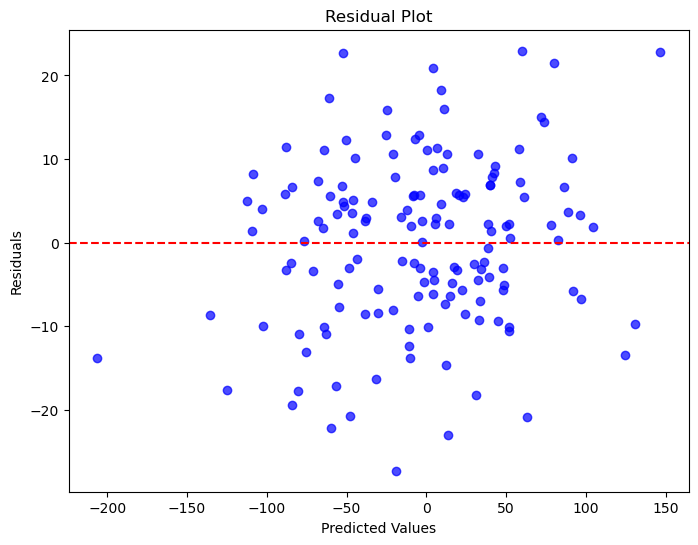

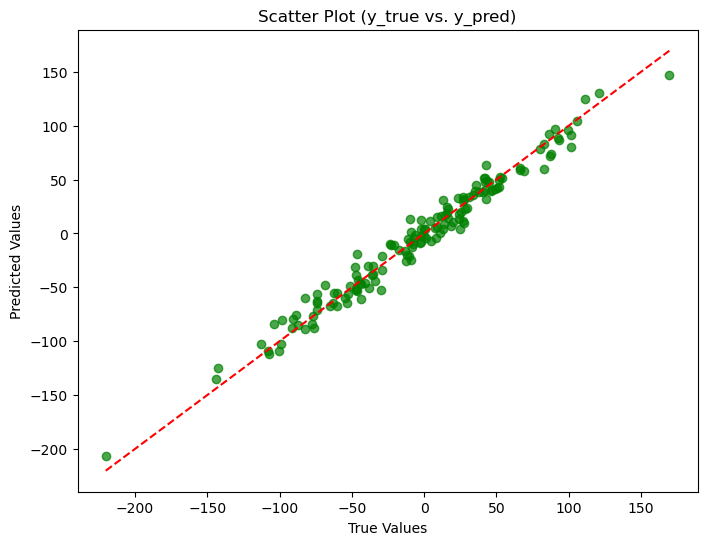

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Scatter plot (y_true vs. y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Scatter Plot (y_true vs. y_pred)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

#### 5.2.3 Classification — metrics
- **Accuracy:** Fraction of correct predictions. Can be misleading when one class dominates.
- **Precision:** Of the items predicted positive, how many were actually positive? Good when false positives are costly.
- **Recall:** Of all the actual positives, how many did we catch? Good when false negatives are costly.
- **F1 score:** Single number that balances precision and recall (their harmonic mean). Useful when classes are imbalanced.

**Choosing metrics:**
- Imbalanced data → focus on **precision/recall** and **F1** (accuracy can look great while missing the minority class).
- Threshold matters: moving the decision threshold trades precision for recall; pick based on business cost.

#### 5.2.4 Classification — visuals
- **Confusion matrix:** Counts of true/false positives/negatives. Shows exactly where the model is making mistakes.
- **ROC curve + AUC:** Plots true positive rate against false positive rate across thresholds. AUC summarizes the curve; higher is better. Works best when class balance isn’t extreme.
- **(Optional) Precision–Recall curve:** More informative than ROC when the positive class is rare.


Accuracy: 0.9266666666666666
Precision: 0.9146341463414634
Recall: 0.9493670886075949
F1 Score: 0.9316770186335404


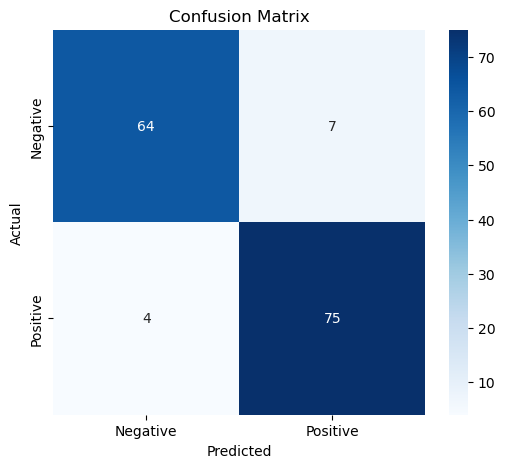

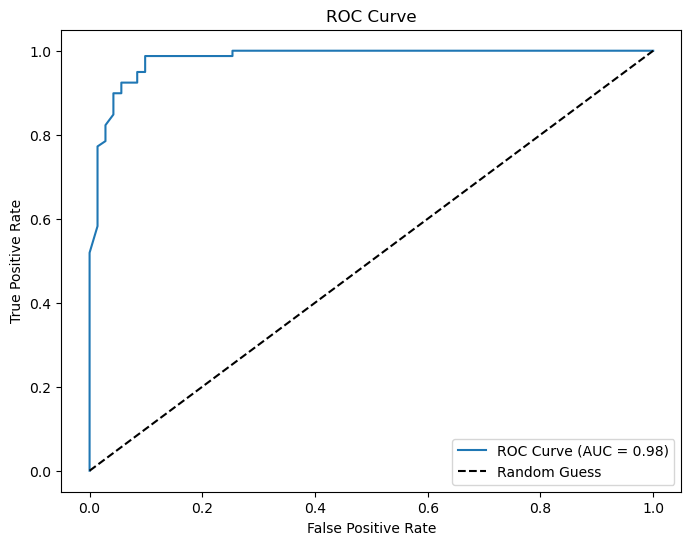

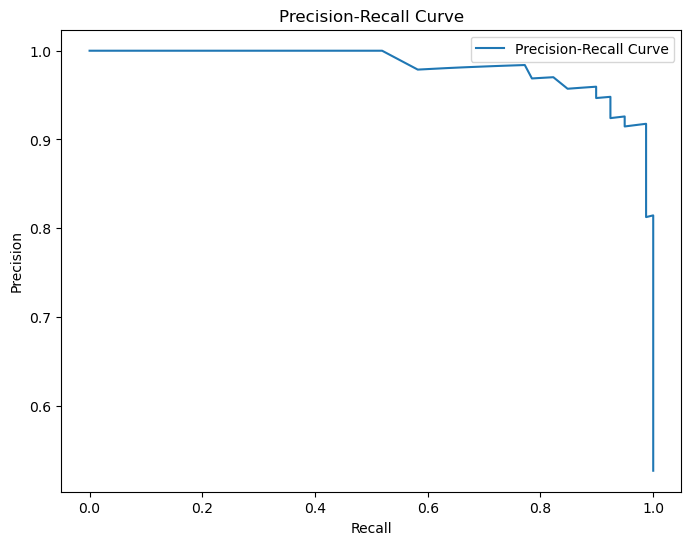

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC/PR curves

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### 5.3 Interpretability and explainability
Interpretability is about understanding **why** the model made a prediction, not just **what** it predicted. This builds trust, helps debug issues, and is often required in regulated settings.

- **Global vs. local:**
  - *Global* explains overall behavior (which features matter most on average).
  - *Local* explains a single prediction (why this one case got this score).

- **Common tools:**
  - **Coefficients** (linear/logistic): sign and size show feature direction and strength.
  - **Feature importance:** tree/forest/boosting importances; prefer **permutation importance** for a fairer view.
  - **Partial Dependence (PDP) / ICE:** show how changing one feature (or two) moves predictions, holding others fixed.
  - **SHAP values:** attribute a prediction to features in a consistent way, both locally and globally.

- **Pitfalls to watch:**
  - **Leakage:** features that sneak target info into training will look “important” but won’t generalize.
  - **Correlated features:** importance can split across twins; PDPs can mislead if features move together in real life.
  - **Extrapolation:** explanations outside the data’s usual range are unreliable.
  - **Fairness:** check performance and errors across groups; explanations can surface bias but don’t fix it alone.

1. GLOBAL: Logistic Regression Coefficients
Coefficients show feature influence (positive=more likely to approve):
              Coefficient
Income           1.094938
Credit_Score     1.866135
Age              0.023790
Loan_Amount     -0.977807

Interpretation: Higher Income and Credit Score increase approval odds, while higher Loan Amount decreases them.

2. GLOBAL: Random Forest Feature Importance
Feature importance from Random Forest (how often a feature is used to split):
              Importance
Credit_Score    0.445292
Income          0.236847
Loan_Amount     0.222358
Age             0.095503

Interpretation: Shows which features the model relies on most for decisions.

3. GLOBAL: Permutation Importance
Permutation importance (performance drop when a feature is shuffled):
Credit_Score    0.216333
Income          0.088000
Loan_Amount     0.022667
Age            -0.009667
dtype: float64

Interpretation: A more reliable importance measure; Credit Score is clearly most impactful.

4.

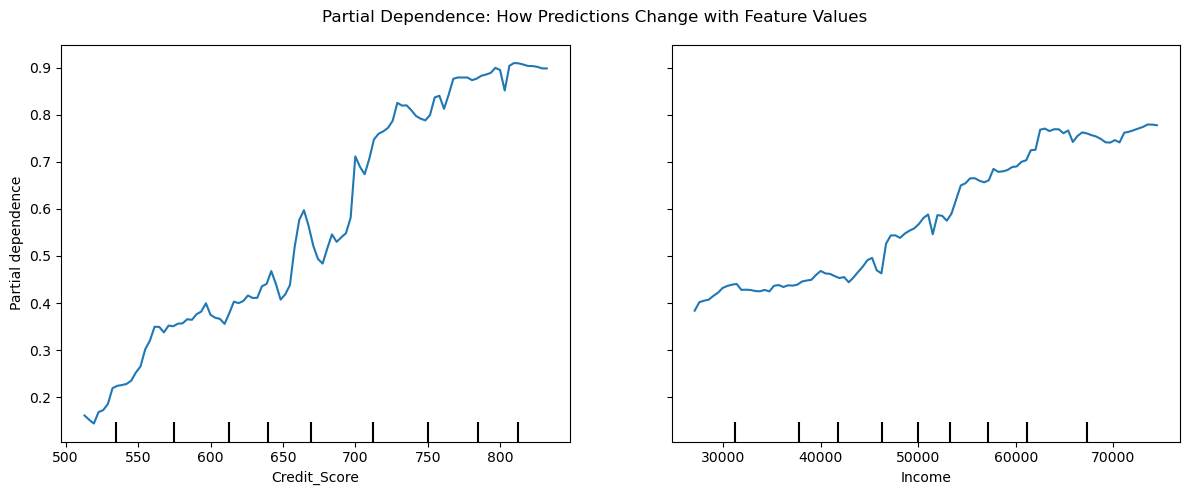


Interpretation: Shows the average prediction change as a feature's value changes, holding others constant.

5. LOCAL: SHAP Values for a Single Prediction
Explaining prediction for a sample with features:
                       426
Income        35526.148091
Credit_Score    729.000000
Age              23.000000
Loan_Amount   17230.973327

Model Prediction: Approved


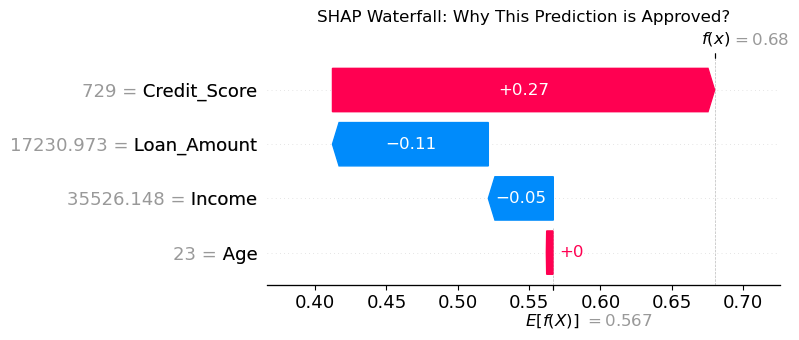


Interpretation: The plot shows how each feature's value 'pushes' the prediction away from the average (base value) to the final score. Red pushes towards approval, blue towards rejection.

6. PITFALL: Correlated Features
Feature Importance WITH a duplicate correlated feature:
                  Importance
Credit_Score        0.416544
Loan_Amount         0.192277
Income              0.157579
Income_Duplicate    0.154305
Age                 0.079294

Notice: The importance of 'Income' is now split with 'Income_Duplicate'. This can be misleading!

7. PITFALL: Fairness - Check Performance Across Groups
Checking accuracy across different age groups:
  - Accuracy for 'Young' group: 0.83
  - Accuracy for 'Middle' group: 0.75
  - Accuracy for 'Senior' group: 0.81

Interpretation: If accuracy differs significantly, the model may be biased. This requires further investigation and potential mitigation (e.g., re-sampling, fairness constraints).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import accuracy_score
import shap

# ============================================================================
# 1. SETUP: Create a synthetic dataset for a loan approval scenario
# ============================================================================
np.random.seed(42)
n_samples = 1000
X = pd.DataFrame({
    'Income': np.random.normal(50000, 15000, n_samples),
    'Credit_Score': np.random.randint(500, 850, n_samples),
    'Age': np.random.randint(22, 65, n_samples),
    'Loan_Amount': np.random.normal(10000, 5000, n_samples)
})
# Create a plausible target variable: higher income/credit score -> higher approval chance
prob = 1 / (1 + np.exp(-( (X['Income']-50000)/10000 + (X['Credit_Score']-650)/50 - (X['Loan_Amount']-10000)/5000 )))
y = (prob > np.random.rand(n_samples)).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale data for linear models and SHAP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# ============================================================================
# 2. GLOBAL INTERPRETABILITY: Logistic Regression Coefficients
# ============================================================================
print("1. GLOBAL: Logistic Regression Coefficients")
print("="*70)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
coeffs = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
print("Coefficients show feature influence (positive=more likely to approve):")
print(coeffs)
print("\nInterpretation: Higher Income and Credit Score increase approval odds, while higher Loan Amount decreases them.\n")


# ============================================================================
# 3. GLOBAL INTERPRETABILITY: Tree-based Feature Importance
# ============================================================================
print("2. GLOBAL: Random Forest Feature Importance")
print("="*70)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) # Trees don't require scaling
importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature importance from Random Forest (how often a feature is used to split):")
print(importances)
print("\nInterpretation: Shows which features the model relies on most for decisions.\n")


# ============================================================================
# 4. GLOBAL INTERPRETABILITY: Permutation Importance
# ============================================================================
print("3. GLOBAL: Permutation Importance")
print("="*70)
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = perm_importance.importances_mean.argsort()
perm_df = pd.DataFrame(perm_importance.importances[perm_sorted_idx].T, columns=X.columns[perm_sorted_idx])
print("Permutation importance (performance drop when a feature is shuffled):")
print(perm_df.mean().sort_values(ascending=False))
print("\nInterpretation: A more reliable importance measure; Credit Score is clearly most impactful.\n")


# ============================================================================
# 5. GLOBAL INTERPRETABILITY: Partial Dependence Plots (PDP)
# ============================================================================
print("4. GLOBAL: Partial Dependence Plot (PDP)")
print("="*70)
print("Plotting PDP for 'Credit_Score' and 'Income'...")
fig, ax = plt.subplots(figsize=(12, 5))
PartialDependenceDisplay.from_estimator(rf, X_train, ['Credit_Score', 'Income'], ax=ax)
plt.suptitle("Partial Dependence: How Predictions Change with Feature Values")
plt.tight_layout()
plt.show()
print("\nInterpretation: Shows the average prediction change as a feature's value changes, holding others constant.\n")


# ============================================================================
# 6. LOCAL INTERPRETABILITY: SHAP Values for a Single Prediction
# ============================================================================
print("5. LOCAL: SHAP Values for a Single Prediction")
print("="*70)
# Explain a single prediction from the test set
sample = X_test.iloc[[0]]
explainer = shap.TreeExplainer(rf)
shap_values_obj = explainer(sample) # Use the explainer as a callable for newer versions
prediction = rf.predict(sample)[0]

print(f"Explaining prediction for a sample with features:\n{sample.T}\n")
print(f"Model Prediction: {'Approved' if prediction == 1 else 'Rejected'}")

# Waterfall plot provides a clear local explanation
shap.initjs()
# For binary classification, explainer(sample) returns an Explanation object.
# We need to select the SHAP values for a specific class (e.g., class 1 for 'Approved')
# to pass a 1D array to the waterfall plot.
shap.waterfall_plot(shap_values_obj[0, :, 1], show=False)
plt.title(f'SHAP Waterfall: Why This Prediction is {"Approved" if prediction == 1 else "Rejected"}?')
plt.tight_layout()
plt.show()
print("\nInterpretation: The plot shows how each feature's value 'pushes' the prediction away from the average (base value) to the final score. Red pushes towards approval, blue towards rejection.\n")


# ============================================================================
# 7. PITFALL DEMONSTRATION: Correlated Features
# ============================================================================
print("6. PITFALL: Correlated Features")
print("="*70)
# Create a highly correlated duplicate feature
X_train_corr = X_train.copy()
X_train_corr['Income_Duplicate'] = X_train['Income'] + np.random.normal(0, 1000, len(X_train))

# Train on data with correlated features
rf_corr = RandomForestClassifier(n_estimators=100, random_state=42)
rf_corr.fit(X_train_corr, y_train)

# Compare feature importance
corr_importance = pd.DataFrame(rf_corr.feature_importances_, index=X_train_corr.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importance WITH a duplicate correlated feature:")
print(corr_importance)
print("\nNotice: The importance of 'Income' is now split with 'Income_Duplicate'. This can be misleading!\n")


# ============================================================================
# 8. PITFALL DEMONSTRATION: Fairness Check
# ============================================================================
print("7. PITFALL: Fairness - Check Performance Across Groups")
print("="*70)
# Add a protected attribute for demonstration
X_test_fairness = X_test.copy()
X_test_fairness['Age_Group'] = pd.cut(X_test_fairness['Age'], bins=[21, 35, 50, 65], labels=['Young', 'Middle', 'Senior'])
y_pred_test = rf.predict(X_test)

print("Checking accuracy across different age groups:")
for group in ['Young', 'Middle', 'Senior']:
    mask = X_test_fairness['Age_Group'] == group
    group_accuracy = accuracy_score(y_test[mask], y_pred_test[mask])
    print(f"  - Accuracy for '{group}' group: {group_accuracy:.2f}")

print("\nInterpretation: If accuracy differs significantly, the model may be biased. This requires further investigation and potential mitigation (e.g., re-sampling, fairness constraints).\n")

## 6. Supervised learning algorithms

### 6.1 Classification algorithms

#### 6.1.1 Logistic Regression
**Explanation**
Logistic regression predicts the chance that something belongs to a class (e.g., “spam” vs “not spam”). It assumes that each feature nudges the odds up or down by a certain amount. Add up all those nudges, pass the total through an S-shaped curve, and you get a clean probability between 0 and 1. Because its boundary is a straight line (or plane), it’s easy to reason about and easy to debug. You can read the weight for a feature and say, “more of this makes ‘yes’ more likely,” which is valuable when you need to explain decisions.

**How it works**
1. Compute a weighted sum of features plus an intercept.
2. Pass the sum through a sigmoid to convert it to a probability.
3. Measure error with log-loss, which punishes confident wrong answers.
4. Adjust weights via gradient descent (or a similar optimizer) to reduce the loss.
5. Use regularization (L2/L1) to keep weights small and reduce overfitting.
6. Pick a threshold (commonly 0.5) to turn probabilities into class labels; adjust it for class imbalance or business costs.

**Advantages**
- Interpretable: weights map directly to how features affect the odds.
- Fast to train, fast to predict, stable on large datasets.
- Produces probabilities that are often well calibrated or easy to calibrate.
- Works well as a baseline; easy to deploy.

**Disadvantages**
- Linear decision boundary; misses curved patterns without feature engineering.
- Sensitive to outliers and multicollinearity unless regularized.
- Requires sensible feature scaling for stable optimization.

**When to use**
- You need a strong, explainable baseline with probabilities.
- Features have roughly linear influence on the outcome (or you can add interactions).
- You care about threshold tuning and cost-sensitive decisions.


Accuracy: 0.8733333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.90      0.85      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



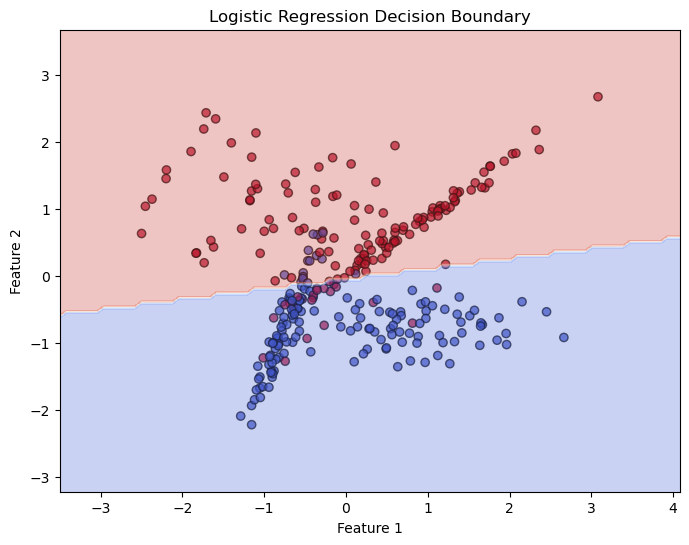

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 6.1.2 Support Vector Machines (SVM)
**Explanation**
SVM looks for the separating boundary that leaves the widest possible safety buffer (the “margin”) between classes. A wide margin means the model isn’t balancing on a knife-edge; it’s less likely to flip its decision when it sees slightly different data. If a straight boundary won’t cut it, SVM uses a kernel trick to bend the boundary, so in the original feature space it might look like a curve that wraps neatly around each class. The result is a crisp decision rule that often generalizes well.

**How it works**
1. Consider all possible separating lines/planes and measure the margin to the closest points from each class.
2. Choose the boundary that maximizes this margin; the closest points that “touch” the margin are the **support vectors** and define the solution.
3. Allow some violations using a softness parameter **C**: larger **C** fits the training data more tightly; smaller **C** prefers a wider margin.
4. If classes aren’t linearly separable, use a kernel (e.g., RBF) to implicitly map inputs to a higher-dimensional space where a linear split becomes possible; **gamma** controls how flexible that curved boundary is.
5. Optionally calibrate scores to probabilities after training.

**Advantages**
- Often excellent accuracy with strong generalization on small/medium tabular datasets.
- Kernels capture complex, non-linear patterns without manual feature engineering.
- Relies only on support vectors, which can make the boundary robust to noise away from the margin.

**Disadvantages**
- Requires careful feature scaling and tuning of **C** and kernel parameters (e.g., **gamma**).
- Training can be slow and memory-heavy on large datasets.
- Raw SVM outputs are margins, not probabilities; probability calibration is an extra step.

**When to use**
- You see non-linear boundaries or overlapping classes and can invest time in tuning.
- Dataset size is small to medium, with clean, scaled features.
- You want a strong classical model without moving to neural networks.

Accuracy: 0.9733333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



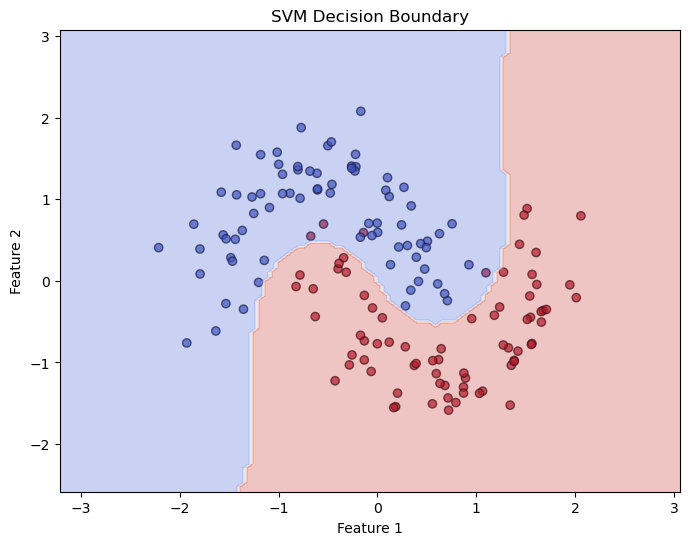

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (non-linearly separable)
# `make_moons` creates a dataset with two interleaving half circles
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train an SVM model with an RBF kernel (handles non-linear patterns)
model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 6.1.3 k-Nearest Neighbours (k-NN)
**Explanation**
k-NN classifies a new sample by asking: “what are the **k** most similar examples I’ve seen, and what classes do they belong to?” If most neighbours are class A, we predict A. There’s no training phase that learns weights; the model simply stores the data and uses distance at prediction time. Because decisions come from nearby points, k-NN adapts to oddly shaped class boundaries—but it also inherits any noise in those neighbours.

**How it works**
1. Keep all training points in memory (optionally in a fast lookup structure like a KD-tree or ball tree).
2. For a new point, compute distances to training points (Euclidean/Manhattan for numeric; cosine for vectors; mixed types need care).
3. Pick the **k** closest points; optionally weight votes by 1/distance so nearer points count more.
4. Majority vote decides the class; ties are broken by rules you choose (e.g., smaller k, weighted vote).

**Advantages**
- Extremely simple; often a strong, quick baseline.
- Naturally captures non-linear, irregular decision regions.
- No model assumptions; handles multi-class out of the box.

**Disadvantages**
- Slow and memory-heavy at prediction time on large datasets.
- Requires feature scaling; distances are meaningless if scales differ.
- Sensitive to noise and the choice of **k**; suffers in high dimensions (curse of dimensionality).
- Harder to interpret decisions beyond “these neighbours voted.”

**When to use**
- Small to medium datasets where locality matters and features are well-scaled.
- You want a simple baseline before trying heavier models.
- Prototype settings where training time must be near-zero and slow inference is acceptable.

Accuracy: 0.9533333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.96      0.94      0.95        72

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



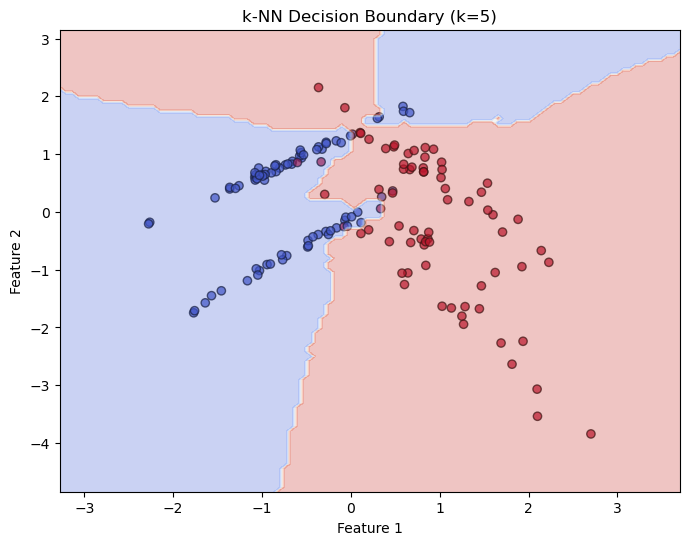

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
# Create a dataset with two classes
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train a k-NN model
# Use k=5 as the number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("k-NN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 6.1.4 Decision Trees (Classification)
**Explanation**
A decision tree learns a flowchart of **if/else** questions that split the data into purer groups step by step. Each split chooses a feature and a threshold that best separates classes, so by the time you reach a leaf, most examples there share the same label. Trees are easy to read and reason about, and they automatically capture interactions (e.g., “if age < 30 **and** income > X”).

**How it works**
1. Start at the root with all training data.
2. For each candidate split (feature + threshold/category), compute impurity improvement (e.g., Gini or entropy).
3. Pick the split with the largest improvement; send points left/right.
4. Repeat on each child until stopping criteria are met (max depth, min samples per leaf, no gain).
5. At a leaf, predict the majority class (optionally with class probabilities from class frequencies).

**Advantages**
- Human-readable rules; great for explanation and auditing.
- Captures non-linearities and feature interactions automatically.
- Little preprocessing: no scaling required; tolerates mixed feature types and missing values (with proper handling).

**Disadvantages**
- High variance: small data changes can yield very different trees.
- Prone to overfitting if allowed to grow deep; needs pruning or depth/leaf limits.
- Typically lower accuracy than ensembles (Random Forest, Gradient Boosting) on complex problems.
- Split criteria can bias toward features with many possible splits; feature importance from a single tree can mislead.

**When to use**
- You need transparent decisions (e.g., compliance, stakeholder trust).
- Data has non-linear patterns and feature interactions, and you want minimal preprocessing.
- As a stepping stone to ensembles: tune a reasonable tree first, then move to Random Forest or Gradient Boosting for accuracy.

Decision Tree Accuracy: 0.9066666666666666

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        78
           1       0.89      0.92      0.90        72

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

Random Forest Accuracy: 0.94

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.92      0.96      0.94        72

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



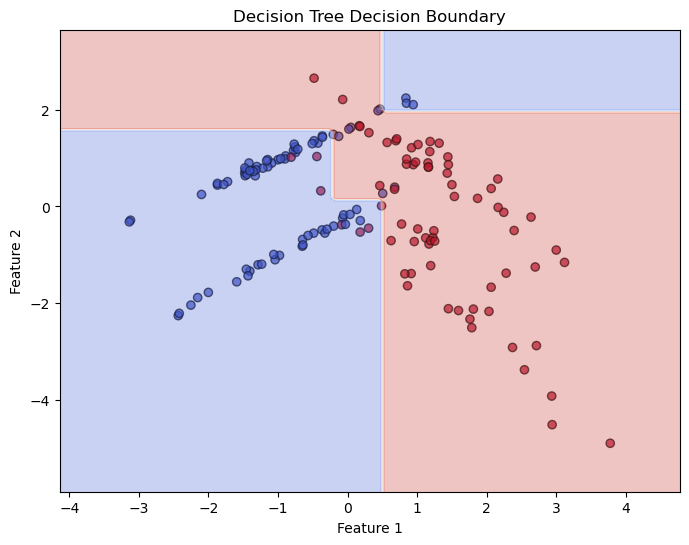

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Decision Tree model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Step 4: Train a Random Forest model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Step 5: Evaluate both models
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_pred))

print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, forest_pred))

# Step 6: Visualize Decision Tree decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Decision Tree Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 6.1.6 Gaussian Naïve Bayes
**Explanation**
Gaussian Naïve Bayes predicts a class by asking: “If this example belonged to class A, how likely are its feature values? What about class B?” It assumes two things to keep the math simple: (1) features act independently once you know the class, and (2) within each class, each numeric feature follows a bell-shaped (normal) distribution. With those assumptions, the model only needs a mean and a variance for each feature in each class to score new examples very quickly.

**How it works**
1. For every class and every feature, compute two summaries from the training rows of that class: the average (mean) and the spread (variance).
2. For a new example, use the normal distribution defined by that mean and variance to get a likelihood number for each feature value under each class. (Think: “given class A, how typical is this value for feature X?”)
3. Combine feature likelihoods for a class by multiplying them together; multiply by the class’s prior probability. In practice we **add** the logarithms of these numbers to avoid numerical underflow.
4. Compare the combined scores across classes and pick the class with the highest score.

**Advantages**
- Extremely fast to train and predict; tiny memory footprint.
- Works surprisingly well with little data.
- Produces class scores that you can calibrate into probabilities.

**Disadvantages**
- The independence assumption is often false; correlated features can mislead it.
- The bell-shaped assumption can be wrong for skewed or multi-modal features.
- Decision boundaries are limited; accuracy drops when assumptions don’t fit.

**When to use**
- As a very quick, strong baseline on small or medium tabular problems.
- When features are roughly bell-shaped within each class and not strongly correlated.
- As a first pass before investing time in heavier models like SVMs or ensembles.


Accuracy: 0.8933333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.86      0.93      0.89        72

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



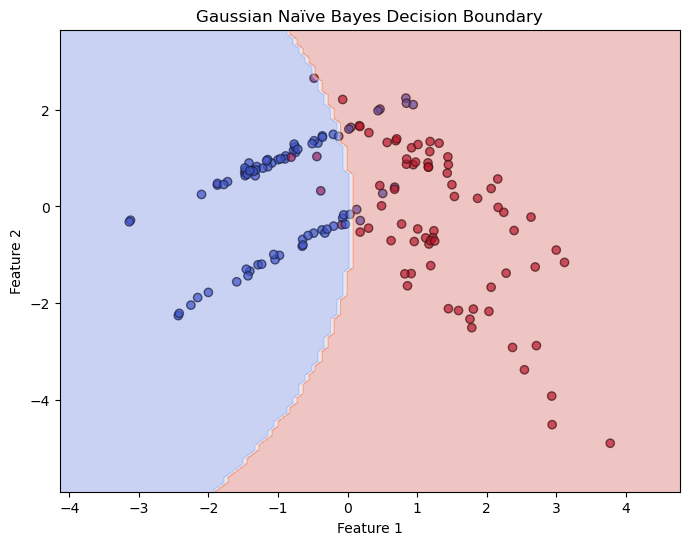

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
# Create a dataset with two classes
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Gaussian Naïve Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 6.2 Regression algorithms

#### 6.2.1 Linear Regression
**Explanation**
Linear regression predicts a number by fitting a straight line (or plane) through your data. The idea is: combine the input features with weights, add a bias, and you get a prediction. The “best” line is the one that keeps the average squared gap between predictions and true values as small as possible. Because the model is straight, you can read each weight as “how much this feature pushes the prediction up or down.”

**How it works**
1. Add an intercept term so the line can shift up or down.
2. Find the weights that minimize the average squared error between predictions and actual values.
3. Use an efficient solver to compute those weights.
4. Evaluate with a metric like mean squared error or mean absolute error.
5. Inspect residuals (prediction errors) to see if a straight-line model is reasonable.

**Advantages**
- Simple, fast, and easy to explain.
- Coefficients give clear feature effects (“holding others fixed”).
- Strong baseline for many numeric prediction tasks.

**Disadvantages**
- Only models straight-line relationships unless you add features (interactions, polynomials).
- Sensitive to outliers, which can drag the line.
- Struggles when features are highly correlated; estimates become unstable.
- Assumes roughly constant error spread and independent errors.

**When to use**
- You want a transparent baseline and quick iteration.
- Relationships look roughly linear or can be made linear with simple feature engineering.
- You need coefficients to explain decisions to stakeholders.


Mean Squared Error: 101.0077156966921
R-squared: 0.9726379442654388


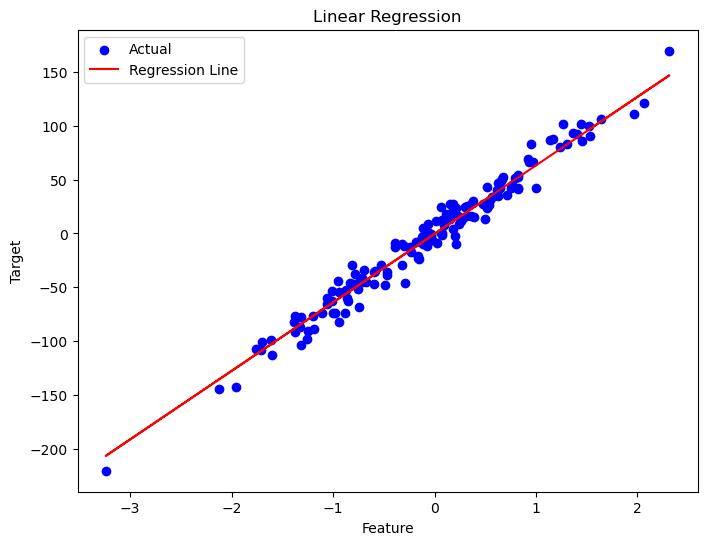

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 6: Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

#### 6.2.2 Ridge Regression (linear with regularization)
**Explanation**
Ridge regression is linear regression with a safety belt. It still fits a straight-line model, but it adds a penalty for large weights, gently shrinking them toward zero. This stabilizes the model when features overlap in what they explain and reduces overfitting on noisy data.

**How it works**
1. Start from linear regression’s goal of small squared errors.
2. Add a regularization term that penalizes large coefficients.
3. Control the strength of that penalty with a single knob called the regularization strength.
4. Choose that strength using validation (or cross-validation) to balance fit vs. simplicity.
5. Refit the model with the chosen strength and evaluate on held-out data.

**Advantages**
- More stable than plain linear regression when features are correlated.
- Often better test performance by reducing overfitting.
- Still fast and fairly interpretable (smaller, less noisy coefficients).

**Disadvantages**
- Still a straight-line model; won’t capture strong non-linear patterns without feature engineering.
- You must tune the regularization strength.
- Coefficients are biased toward zero, which can slightly reduce interpretability if over-regularized.

**When to use**
- You like linear regression but your features are correlated or noisy.
- You need a dependable, low-variance linear model for production.
- You want a simple model that generalizes better than plain least squares.

Mean Squared Error: 101.55816397732718
R-squared: 0.9724888329185496


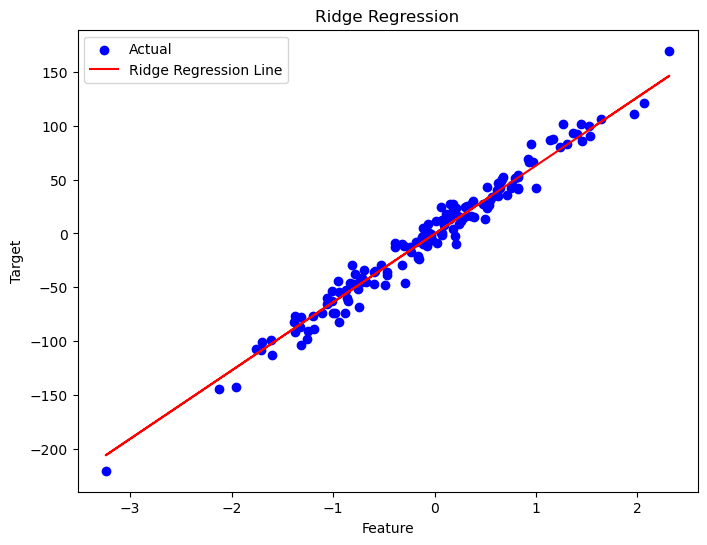

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Ridge Regression model
# Alpha is the regularization strength; higher values mean more regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = ridge.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 6: Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Line')
plt.title("Ridge Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

#### 6.2.3 Support Vector Regression (SVR)
**Explanation**
SVR predicts numbers by fitting a function that stays as flat as possible while keeping most predictions within a small “tolerance band” around the true values. Small errors inside this band are ignored; only bigger misses matter. With kernels, SVR can bend to follow curved patterns without you hand-crafting features.

**How it works**
1. Choose a tolerance width (epsilon) that defines the “no-penalty” zone around the prediction.
2. Fit a function that keeps most training points inside this zone while remaining as simple/flat as possible.
3. Points outside the zone become “support vectors” and influence the fit.
4. Hyperparameters:
   - C controls how much you punish points outside the zone (bigger C = fit training data harder).
   - epsilon sets the width of the tolerance band.
   - For RBF kernels, gamma controls how wiggly the function can be.
5. Always scale features first; distances drive the kernel.

**Advantages**
- Handles non-linear relationships via kernels without manual feature engineering.
- Robust to modest outliers thanks to the epsilon zone.
- Strong accuracy on small to medium tabular datasets.

**Disadvantages**
- Needs careful scaling and tuning of C/epsilon/gamma.
- Training can be slow and memory-heavy on large datasets.
- Predictions are less interpretable than linear models.

**When to use**
- You see curved patterns and have a small/medium dataset.
- You can afford hyperparameter tuning and want high accuracy without neural nets.
- You already standardized features (a must).


Mean Squared Error: 1045.3413181559201
R-squared: 0.7168267076258741


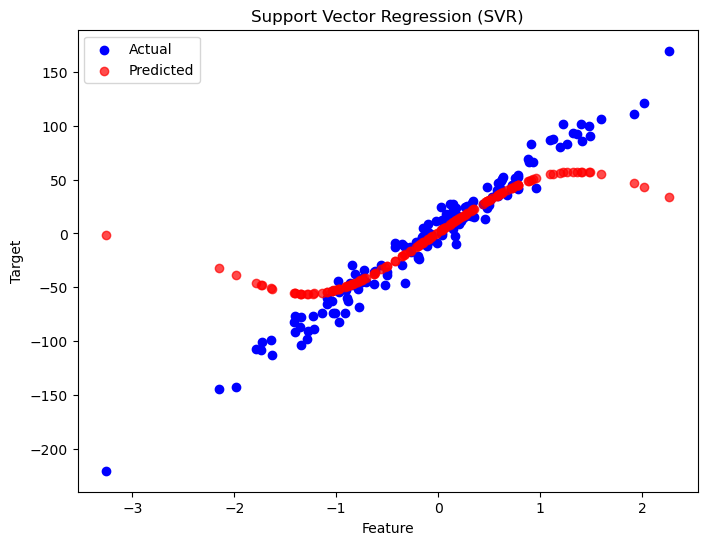

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train an SVR model with an RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = svr.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 7: Visualize the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.7)
plt.title("Support Vector Regression (SVR)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

#### 6.2.4 Decision Tree Regression
**Explanation**
A tree regressor predicts by splitting the data into regions using simple if/else rules, then assigning each region the average target value of the training points inside it. Trees naturally capture non-linear effects and feature interactions (e.g., “if rooms > 3 and location = urban, then…”), with minimal preprocessing.

**How it works**
1. Start with all data at the root.
2. Try candidate splits (feature + threshold or category) and pick the one that most reduces target variance (or squared error).
3. Recurse on each child, repeating the best split.
4. Stop when nodes are small, depth is high enough, or further splits don’t help.
5. Each leaf predicts the mean target of its training samples.

**Advantages**
- Intuitive rules; easy to visualize and explain.
- Captures non-linearities and interactions out of the box.
- Works with mixed feature types; no scaling required.

**Disadvantages**
- High variance; overfits if grown too deep without constraints.
- Unstable to small data changes.
- Poor at extrapolating beyond the training target range (piecewise-constant).

**When to use**
- You want readable rules and minimal preprocessing.
- Relationships are non-linear or depend on feature interactions.
- As a base model before moving to ensembles like Random Forest or Gradient Boosting.

Decision Tree Regression:
Mean Squared Error: 443.82274359579867
R-squared: 0.884860348907364

Random Forest Regression:
Mean Squared Error: 394.38671418513667
R-squared: 0.8976853950769961


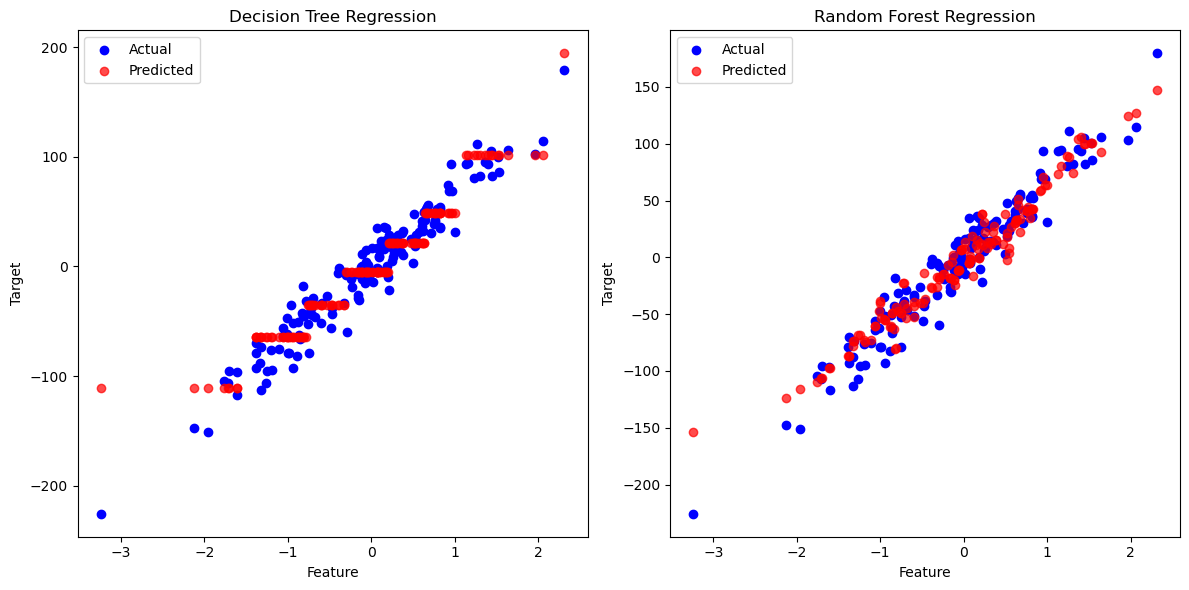

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Step 4: Train a Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Step 5: Make predictions on the test set
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

# Step 6: Evaluate both models
print("Decision Tree Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, tree_pred))
print("R-squared:", r2_score(y_test, tree_pred))

print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, forest_pred))
print("R-squared:", r2_score(y_test, forest_pred))

# Step 7: Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot Decision Tree predictions
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, tree_pred, color='red', label='Predicted', alpha=0.7)
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# Plot Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, forest_pred, color='red', label='Predicted', alpha=0.7)
plt.title("Random Forest Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.tight_layout()
plt.show()